<a href="https://colab.research.google.com/github/Durawix/Text_Mining_Reddit_Api/blob/main/Reddit_relationships_script_RS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ≈ÅƒÑCZENIE Z API Reddita

≈ªeby uzyskaƒá klucz API wystarczy zalogowaƒá siƒô na poni≈ºszej stronie i kliknƒÖc przycisk create another app:

https://www.reddit.com/prefs/apps

In [ ]:
!pip install praw

In [ ]:
import praw

# === KONFIGURACJA ===
CLIENT_ID = "Placeholder"          # <- podmie≈Ñ
CLIENT_SECRET = "Placeholder"   # <- podmie≈Ñ
USER_AGENT = "reddit_text_analysis_script"
SUBREDDIT_NAME = "relationships" # <- wybrany wƒÖtek
POST_LIMIT = 500
OUTPUT_FILE = "reddit_{SUBREDDIT_NAME}posts.csv" # <- nazwa pliku

# === INICJALIZACJA API ===
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent=USER_AGENT
)

# === POBIERANIE POST√ìW ===
subreddit = reddit.subreddit(SUBREDDIT_NAME)

posts = []
for submission in subreddit.new(limit=POST_LIMIT):
    posts.append({
        "id": submission.id,
        "title": submission.title,
        "text": submission.selftext,
        "score": submission.score,
        "url": submission.url
    })

# === ZAPIS DO CSV ===
df = pd.DataFrame(posts)
df.to_csv(OUTPUT_FILE, index=False, encoding='utf-8')

print(f"Pobrano {len(df)} post√≥w z r/{SUBREDDIT_NAME} i zapisano do pliku: {OUTPUT_FILE}")

# Przyk≈Çad ‚Äì poka≈º pierwsze 5 tytu≈Ç√≥w
for post in posts[:5]:
    print(post["title"])


ResponseException: received 401 HTTP response

In [ ]:
# Sprawdzenie gdzie pliki zosta≈Çy zapisane
import os

print("Pe≈Çna ≈õcie≈ºka zapisanego pliku:")
print(os.path.abspath(OUTPUT_FILE))


Pe≈Çna ≈õcie≈ºka zapisanego pliku:
c:\Users\Jakub\Documents\Kuba\Studia\Projekty GIT\Relacje_spolecznosciowe\reddit_{SUBREDDIT_NAME}posts.csv


In [ ]:
# Potrzebne biblioteki -> Wpisac w terminalu

!pip install spacy pandas matplotlib wordcloud nltk

!pip install scipy scikit-learn networkx seaborn

!python -m spacy download en_core_web_sm


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.8/12.8 MB 88.5 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving reddit_relationships_posts.csv to reddit_relationships_posts.csv


In [ ]:
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Wczytaj dane
df = pd.read_csv("reddit_relationships_posts.csv")

# Po≈ÇƒÖcz title i text
df["content"] = df["title"].fillna("") + " " + df["text"].fillna("")

# Inicjalizacja NLP
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words

# Usuwanie wybranych s≈Ç√≥w

extra_stopwords = {
    "i", "me", "my", "mine", "myself",
    "im", "i'm", "ive", "i‚Äôve", "i‚Äôd", "i‚Äôll",
    "m", "s", "ve", "re", "ll", "d", "wouldnt", "couldnt", "cant", "dont", "didnt"
}
custom_stopwords = stop_words.union(extra_stopwords)



# Funkcja czyszczƒÖca i lematyzujƒÖca
def preprocess(text):
    text = re.sub(r"http\S+|www.\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    doc = nlp(text)
    lemmas = [
        token.lemma_ for token in doc
        if token.lemma_.lower() not in custom_stopwords and token.is_alpha and len(token.lemma_) > 1
    ]
    return lemmas

# Przetw√≥rz wszystkie teksty
df["lemmas"] = df["content"].apply(preprocess)

# Sp≈Çaszcz wszystkie s≈Çowa do jednej listy
all_words = [lemma for sublist in df["lemmas"] for lemma in sublist]

# Policz czƒôsto≈õƒá
word_freq = Counter(all_words)

# Eliminacja rzadkich s≈Ç√≥w
filtered_words = {word: count for word, count in word_freq.items() if count > 5}





# Wykresy

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# Lista r√≥l spo≈Çecznych
roles = {
    'boyfriend', 'girlfriend', 'husband', 'wife',
    'mom', 'dad', 'mother', 'father',
    'friend', 'sister', 'brother',
    'partner', 'ex', 'roommate', 'coworker',
    'daughter', 'son'
}

# WyciƒÖgniƒôcie r√≥l z ka≈ºdego posta
def extract_roles(lemmas):
    return list(set(word for word in lemmas if word in roles))

df["roles_in_post"] = df["lemmas"].apply(extract_roles)


In [ ]:
# Zliczamy wsp√≥≈Çwystƒôpowania (bigrams of roles)
edge_counter = Counter()

for role_list in df["roles_in_post"]:
    for pair in combinations(sorted(role_list), 2):
        edge_counter[pair] += 1

# Tworzymy graf
G = nx.Graph()
for (role1, role2), weight in edge_counter.items():
    G.add_edge(role1, role2, weight=weight)




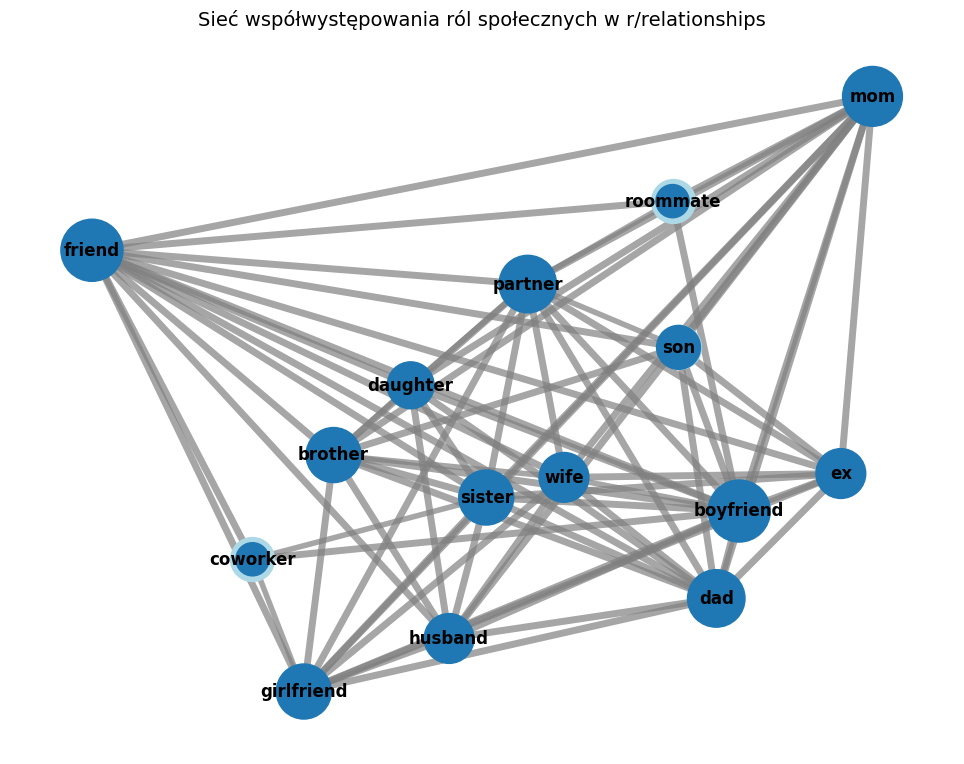

In [59]:
plt.figure(figsize=(10, 8))
pos = nx.kamada_kawai_layout(G)


# Wƒôz≈Çy
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')

centrality = nx.degree_centrality(G)
nx.draw_networkx_nodes(G, pos, node_size=[v * 2000 for v in centrality.values()])

# Krawƒôdzie z wagƒÖ
edges = G.edges(data=True)
weights = [data['weight'] for _, _, data in edges]
nx.draw_networkx_edges(G, pos, edge_color='gray', width=edge_widths, alpha=0.7, arrows=False)
edge_widths = [min(G[u][v]["weight"], 5) for u, v in G.edges()]


# Etykiety
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

plt.title("Sieƒá wsp√≥≈Çwystƒôpowania r√≥l spo≈Çecznych w r/relationships", fontsize=14)
plt.axis('off')
plt.tight_layout(pad=2)
plt.show()


In [ ]:
# from nltk.sentiment import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

# sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jakub\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [60]:
for s in ['positive', 'negative', 'mixed', 'neutral']:
    sample = df[df['sentiment'] == s].sample(3)
    print(f"--- {s.upper()} ---")
    print(sample["content"].values)

--- POSITIVE ---
['Should I confront my girlfriend about chatting with another guy? \nI (20M) have been in a relationship with my girlfriend (20F) for more than a year, and we truly care about each other. We‚Äôre in a long-distance relationship during the week because of university, but we see each other on weekends and are emotionally close.\n\nLately, I‚Äôve been feeling a little off due to something I noticed. There‚Äôs this one guy she chats with online‚Äînothing explicitly wrong from what I can tell, but I can‚Äôt shake the feeling that she hides that interaction when I‚Äôm around. For example, she won‚Äôt open his messages in front of me or skips them quickly. She‚Äôs open with most of her chats, except this one. She just once said that he texted her because of her art profile. Yesterday i saw that he reacted with üòç to the story of her new personal post and she replied with ü§çü§çü§çthat triggers a little jealousy and insecurity in me, especially because I don‚Äôt have a bi

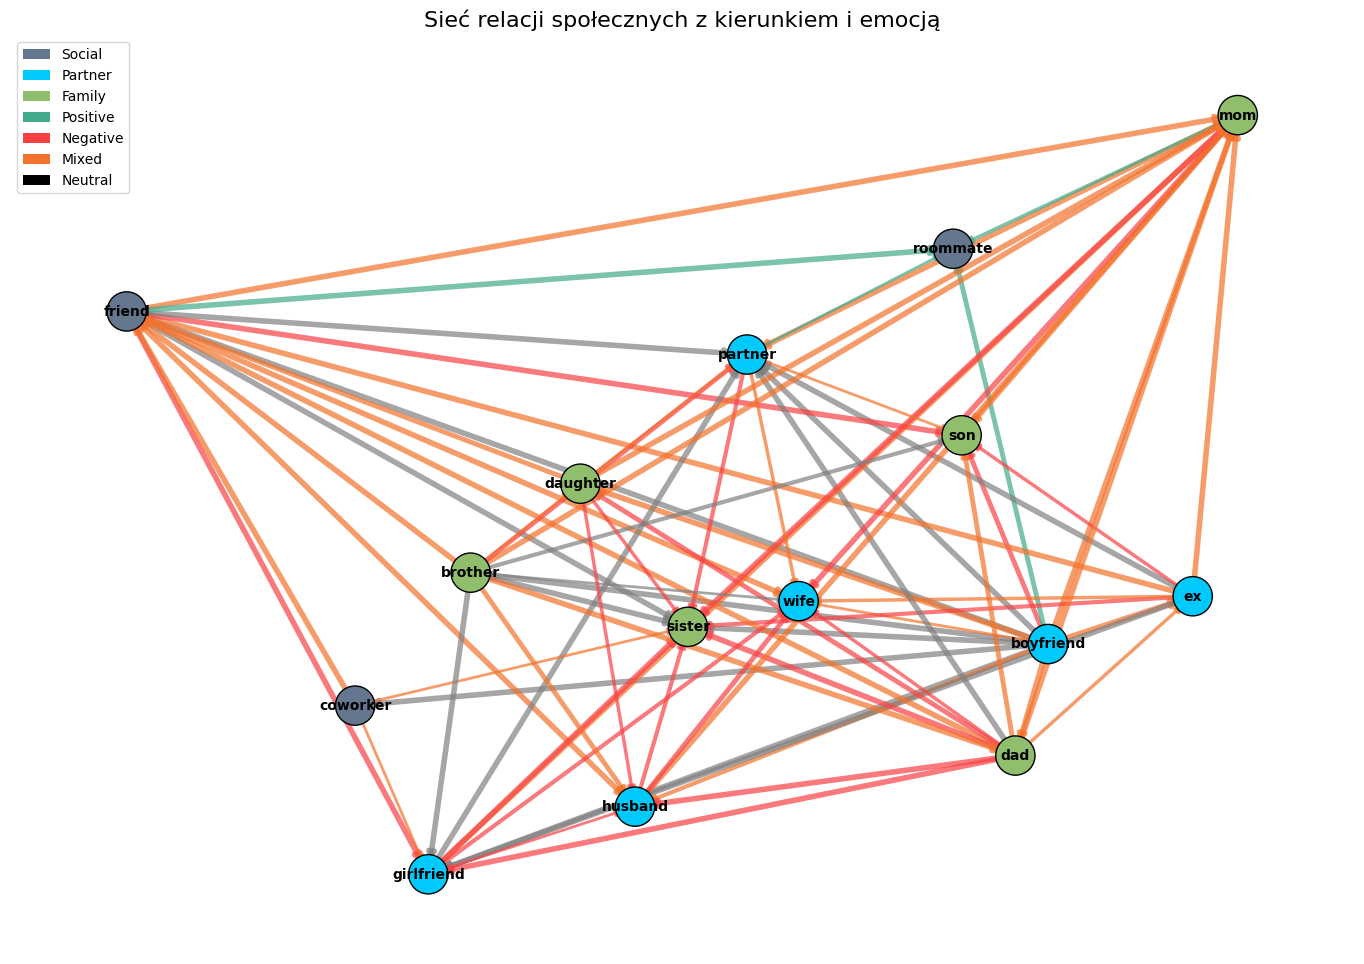

In [77]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
from matplotlib.patches import Patch

# === 1. S≈ÅOWNIKI ===
positive_words = {
    "love", "trust", "respect", "support", "happy", "safe", "care", "greatful", "kind", "calm", "best", "supportive"
}

negative_words = {
    "hate", "cheat", "lie", "abuse", "ignore", "betray", "toxic", "fight", "hurt", "sad", "cry", "breakup", "abandon",
    "depressed", "manipulate", "mad", "shout", "jealous", "argument", "angry", "frustrated", "disrespect", "divorce",
    "immature", "uncaring", "snapping", "beating", "controlling", "dumb", "fuming", "annoying", "uninteresting",
    "reassurance", "clingy", "anxious"
}

# Mapowanie duplikat√≥w r√≥l
role_merge_map = {"mother": "mom", "father": "dad"}

roles = {
    'boyfriend', 'girlfriend', 'husband', 'wife',
    'mom', 'dad', 'mother', 'father',
    'friend', 'sister', 'brother',
    'partner', 'ex', 'roommate', 'coworker',
    'daughter', 'son'
}

groups = {
    "family": {"mom", "dad", "sister", "brother", "daughter", "son"},
    "partner": {"boyfriend", "girlfriend", "husband", "wife", "partner", "ex"},
    "social": {"friend", "roommate", "coworker", "neighbour"}
}

group_colors = {
    "social": "#65778F",
    "partner": "#00CAFC",
    "family": "#90BE6D",
    "other": "#000000"
}

# === 2. FUNKCJE ===
def get_sentiment(lemmas, min_pos=4, min_neg=4):
    pos_count = sum(1 for w in lemmas if w in positive_words)
    neg_count = sum(1 for w in lemmas if w in negative_words)
    if pos_count >= min_pos and neg_count >= min_neg:
        return "mixed"
    elif neg_count >= min_neg:
        return "negative"
    elif pos_count >= min_pos:
        return "positive"
    else:
        return "neutral"

def merge_roles(lemmas):
    return [role_merge_map.get(w, w) for w in lemmas]

def extract_roles(lemmas):
    return list(set(w for w in lemmas if w in roles))

# === 3. PRZETWARZANIE DANYCH ===
df["lemmas"] = df["lemmas"].apply(merge_roles)
df["sentiment"] = df["lemmas"].apply(get_sentiment)
df["roles_in_post"] = df["lemmas"].apply(extract_roles)

# === 4. GRAF G≈Å√ìWNY ===
G = nx.DiGraph()
for _, row in df.iterrows():
    rlist = sorted(row["roles_in_post"])
    sentiment = row["sentiment"]
    for source, target in combinations(rlist, 2):
        if G.has_edge(source, target):
            G[source][target]["weight"] += 1
            G[source][target]["sentiments"].append(sentiment)
        else:
            G.add_edge(source, target, weight=1, sentiments=[sentiment])

for u, v in G.edges():
    sentiments = G[u][v]["sentiments"]
    G[u][v]["sentiment"] = Counter(sentiments).most_common(1)[0][0] if sentiments else "neutral"

# === 5. FILTRACJA KRAWƒòDZI ===
edges_to_remove = [(u, v) for u, v, d in G.edges(data=True) if d["weight"] <= 3]
G.remove_edges_from(edges_to_remove)

# === 6. WIZUALIZACJA ===
pos = nx.kamada_kawai_layout(G)
edge_widths = [min(G[u][v]["weight"] * 0.5, 4) for u, v in G.edges()]

node_colors = []
for node in G.nodes():
    for group, members in groups.items():
        if node in members:
            node_colors.append(group_colors[group])
            break
    else:
        node_colors.append(group_colors["other"])

edge_colors = []
for _, _, d in G.edges(data=True):
    edge_colors.append({
        "positive": "#43aa8b",
        "negative": "#f94144",
        "mixed": "#f3722c"
    }.get(d["sentiment"], "gray"))

plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, edgecolors='black')
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, alpha=0.7, arrows=True)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

legend_nodes = [
    Patch(facecolor="#65778F", label='Social'),
    Patch(facecolor="#00CAFC", label='Partner'),
    Patch(facecolor='#90BE6D', label='Family')
]
legend_edges = [
    Patch(facecolor='#43aa8b', label='Positive'),
    Patch(facecolor='#f94144', label='Negative'),
    Patch(facecolor='#f3722c', label='Mixed'),
    Patch(facecolor='#000000', label='Neutral')
]
plt.legend(handles=legend_nodes + legend_edges, loc='upper left', fontsize=10)
plt.title("Sieƒá relacji spo≈Çecznych z kierunkiem i emocjƒÖ", fontsize=16)
plt.axis("off")
plt.tight_layout(pad=2)
plt.show()


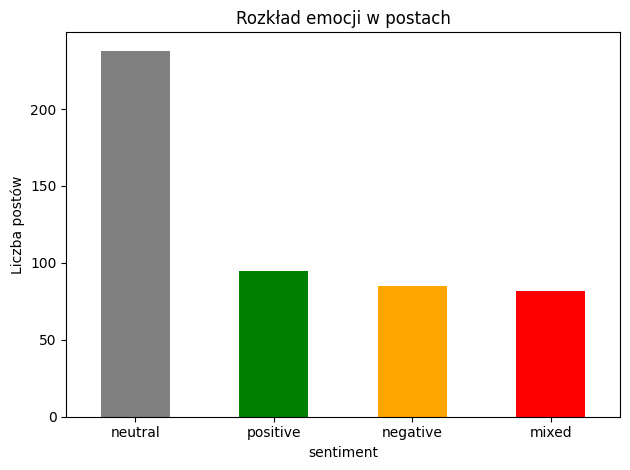

In [80]:


df["sentiment"].value_counts().plot(kind="bar", color=["gray", "green", "orange", "red"])
plt.title("Rozk≈Çad emocji w postach")
plt.ylabel("Liczba post√≥w")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


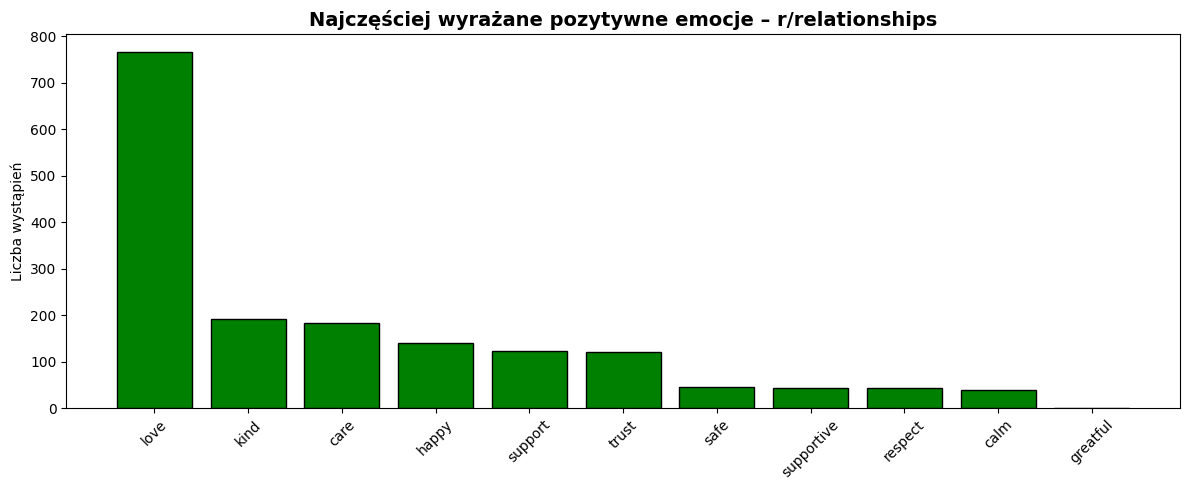

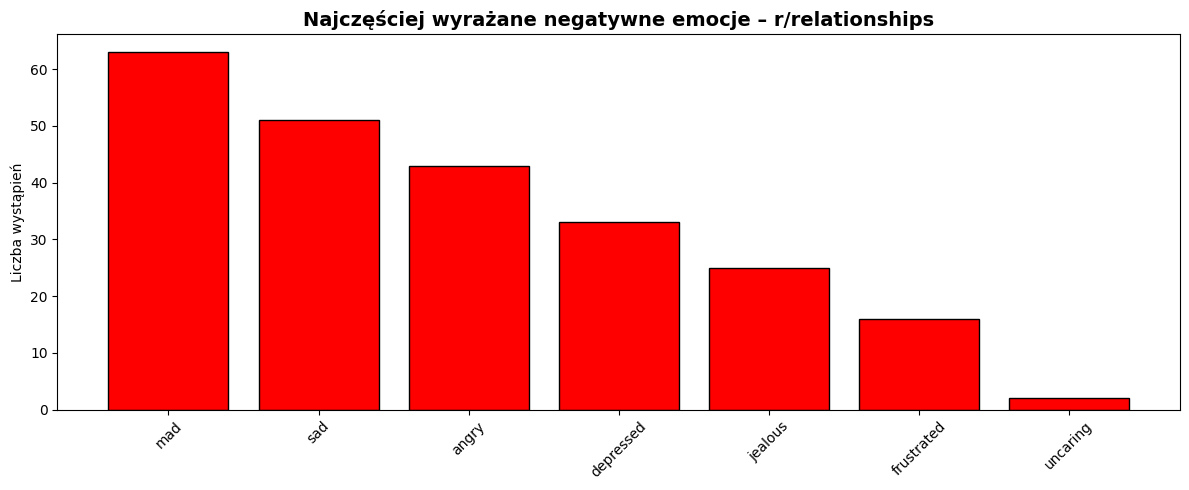

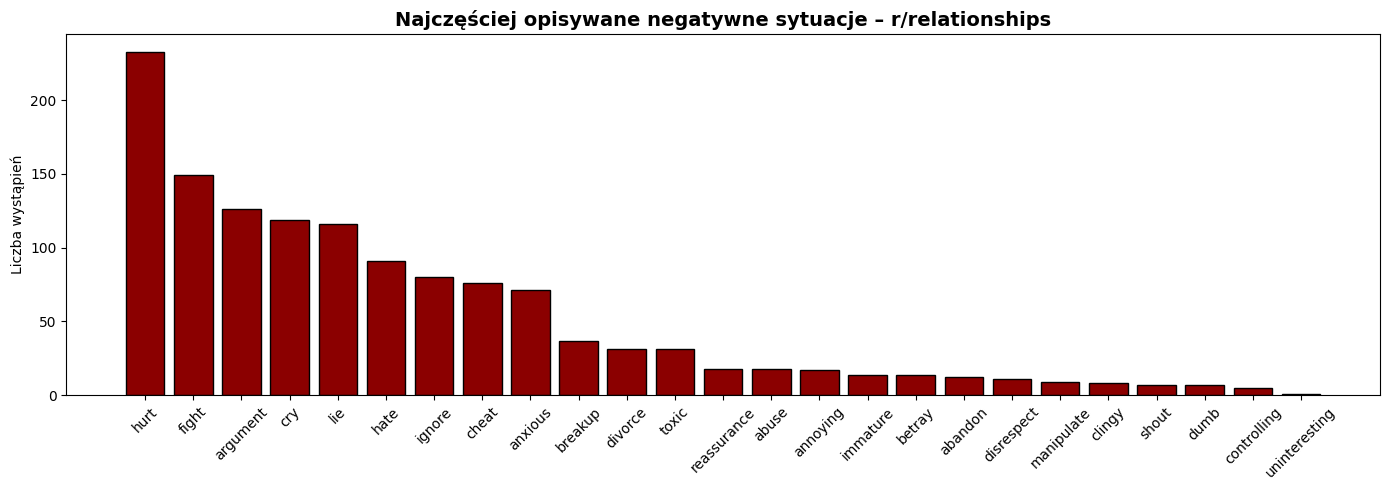

In [79]:
import matplotlib.pyplot as plt
from collections import Counter


behavior_words = negative_words - emotion_negative_words

# ZLICZ WYSTƒÑPIENIA W KORPUSIE
positive_words_counts = {word: word_freq[word] for word in positive_words if word in word_freq}
negative_emotion_counts = {word: word_freq[word] for word in emotion_negative_words if word in word_freq}
behavior_counts = {word: word_freq[word] for word in behavior_words if word in word_freq}

# SORTOWANIE
positive_words_counts = dict(sorted(positive_words_counts.items(), key=lambda x: x[1], reverse=True))
negative_emotion_counts = dict(sorted(negative_emotion_counts.items(), key=lambda x: x[1], reverse=True))
behavior_counts = dict(sorted(behavior_counts.items(), key=lambda x: x[1], reverse=True))


# === WYKRES 1: POZYTYWNE EMOCJE ===
plt.figure(figsize=(12, 5))
plt.bar(positive_words_counts.keys(), positive_words_counts.values(), color="green", edgecolor='black')
plt.title("Najczƒô≈õciej wyra≈ºane pozytywne emocje ‚Äì r/relationships", fontsize=14, weight="bold")
plt.ylabel("Liczba wystƒÖpie≈Ñ")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === WYKRES 1: NEGATYWNE EMOCJE ===
plt.figure(figsize=(12, 5))
plt.bar(negative_emotion_counts.keys(), negative_emotion_counts.values(), color="red", edgecolor='black')
plt.title("Najczƒô≈õciej wyra≈ºane negatywne emocje ‚Äì r/relationships", fontsize=14, weight="bold")
plt.ylabel("Liczba wystƒÖpie≈Ñ")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# === WYKRES 2: NEGATYWNE ZACHOWANIA / ZDARZENIA ===
plt.figure(figsize=(14, 5))
plt.bar(behavior_counts.keys(), behavior_counts.values(), color="darkred", edgecolor='black')
plt.title("Najczƒô≈õciej opisywane negatywne sytuacje ‚Äì r/relationships", fontsize=14, weight="bold")
plt.ylabel("Liczba wystƒÖpie≈Ñ")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-78-58968960>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_deg.values()), y=list(top_deg.keys()), palette="viridis")


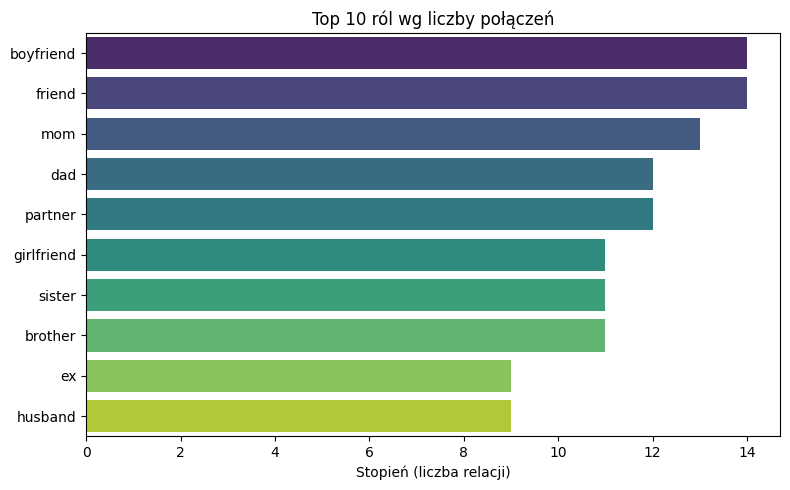

In [78]:
import seaborn as sns

deg = dict(G.degree())
top_deg = dict(sorted(deg.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(8, 5))
sns.barplot(x=list(top_deg.values()), y=list(top_deg.keys()), palette="viridis")
plt.title("Top 10 r√≥l wg liczby po≈ÇƒÖcze≈Ñ")
plt.xlabel("Stopie≈Ñ (liczba relacji)")
plt.tight_layout()
plt.show()


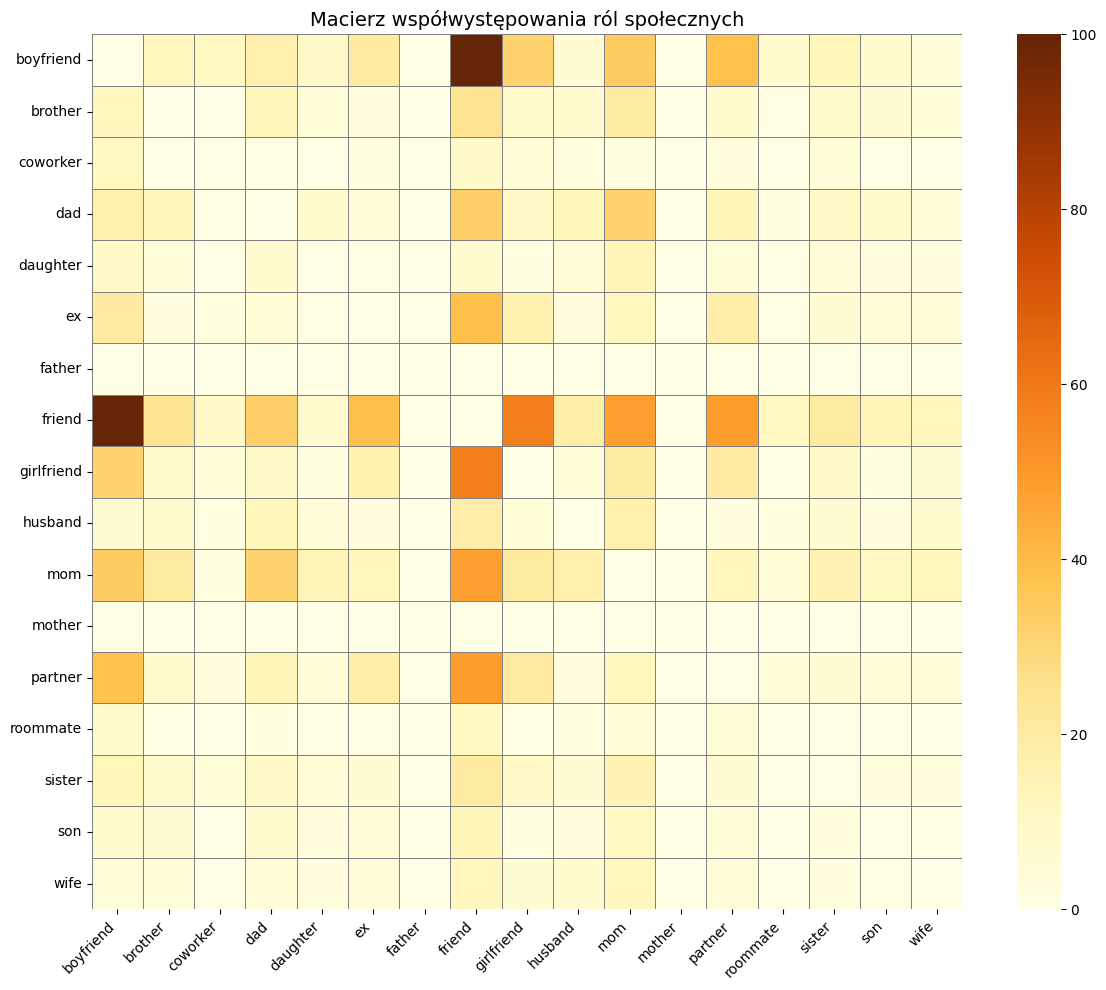

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import pandas as pd

# UporzƒÖdkowana lista r√≥l
role_list = sorted(list(roles))

# Macierz wsp√≥≈Çwystƒôpowania
cooccur = pd.DataFrame(0, index=role_list, columns=role_list)

for _, row in df.iterrows():
    rlist = row["roles_in_post"]
    for a, b in combinations(rlist, 2):
        if a in roles and b in roles:
            cooccur.loc[a, b] += 1
            cooccur.loc[b, a] += 1  # bo wsp√≥≈Çwystƒôpowanie jest symetryczne

# Heatmapa
plt.figure(figsize=(12, 10))
sns.heatmap(cooccur, cmap="YlOrBr", linewidths=0.5, linecolor='gray')
plt.title("Macierz wsp√≥≈Çwystƒôpowania r√≥l spo≈Çecznych", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


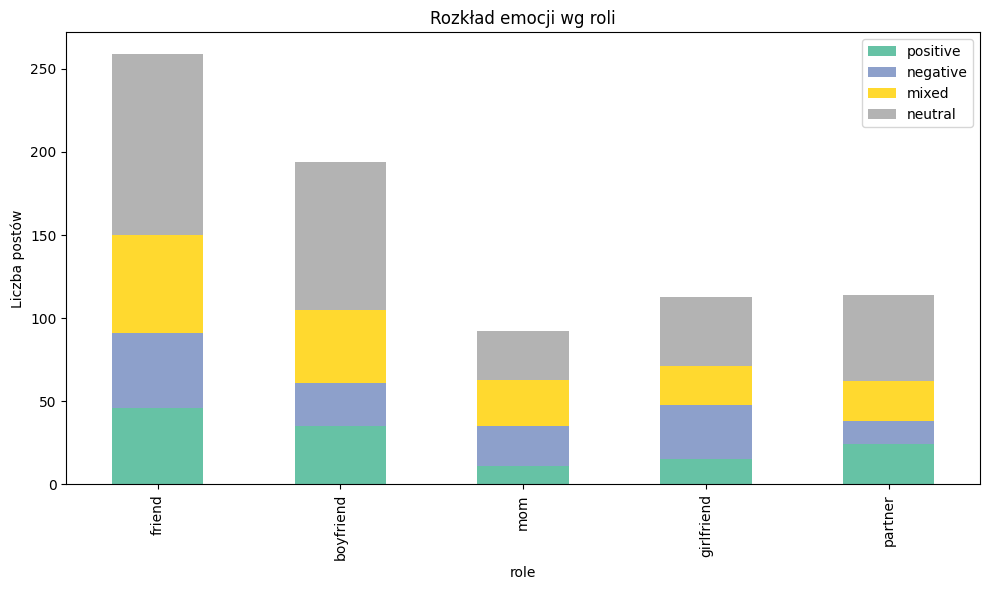

In [73]:
from collections import defaultdict

role_sentiment = defaultdict(Counter)
for _, row in df.iterrows():
    for role in row["roles_in_post"]:
        role_sentiment[role][row["sentiment"]] += 1

# Przyk≈Çad wykresu dla top 5 r√≥l
top_roles = sorted(role_sentiment, key=lambda r: sum(role_sentiment[r].values()), reverse=True)[:5]
df_sent = pd.DataFrame([{**v, 'role': k} for k, v in role_sentiment.items() if k in top_roles]).fillna(0)

df_sent.set_index("role")[["positive", "negative", "mixed", "neutral"]].plot(
    kind="bar", stacked=True, colormap="Set2", figsize=(10, 6)
)
plt.title("Rozk≈Çad emocji wg roli")
plt.ylabel("Liczba post√≥w")
plt.tight_layout()
plt.show()


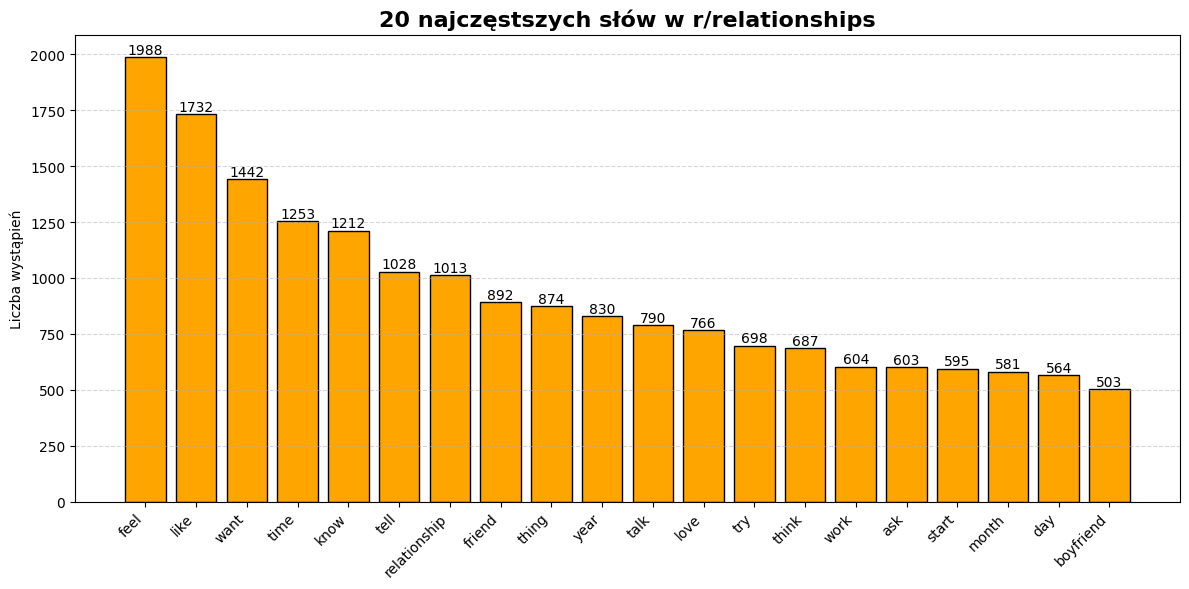

In [72]:
# 1. Wykres s≈Çupkowy najczƒôstszych s≈Ç√≥w
import matplotlib.pyplot as plt

# Dane
common_words = dict(Counter(filtered_words).most_common(20))
words = list(common_words.keys())
counts = list(common_words.values())

# Wykres
plt.figure(figsize=(12, 6))
bars = plt.bar(words, counts, color='orange', edgecolor='black')

# Etykiety na s≈Çupkach
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

# Styl i opis
plt.title("20 najczƒôstszych s≈Ç√≥w w r/relationships", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Liczba wystƒÖpie≈Ñ")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


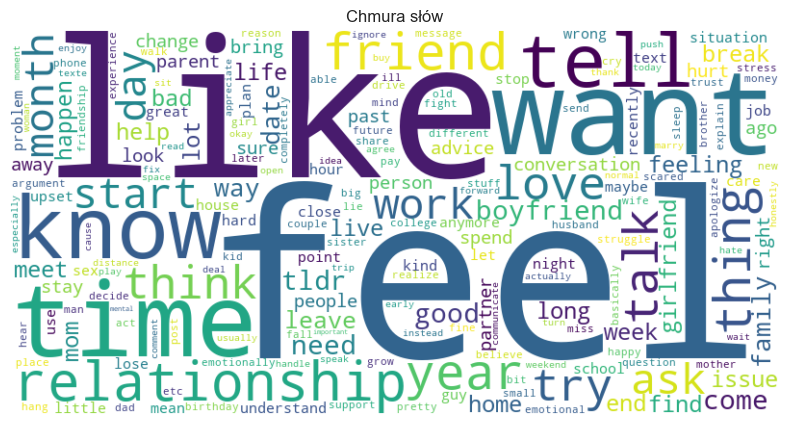

In [ ]:
# 2 Chmura s≈Ç√≥w
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_words)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Chmura s≈Ç√≥w")
plt.show()

In [ ]:
unwanted_words = {"thing", "day", "tldr"}

filtered_words_clean = {
    word: count for word, count in word_freq.items()
    if count > 5 and word not in unwanted_words # Usuwam niechciane s≈Çowa i takie kt√≥re wystƒôpujƒÖ mniej ni≈º 5 razy w zbiorze
}

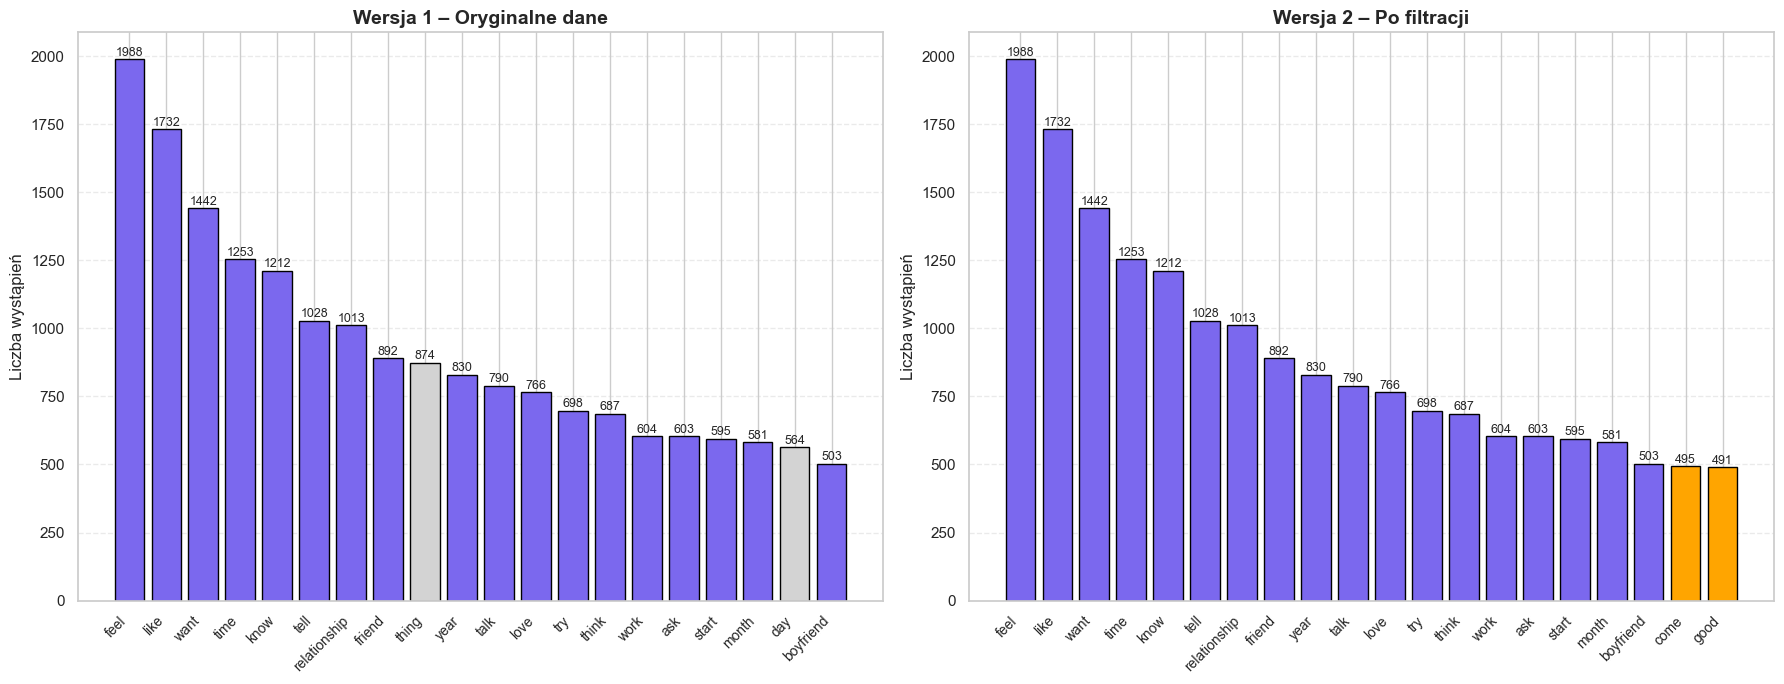

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Dane 1 ‚Äì oryginalne
words_1 = list(common_words.keys())
counts_1 = list(common_words.values())

# Dane 2 ‚Äì po filtrze
top_20_words = dict(Counter(filtered_words_clean).most_common(20))
words_2 = list(top_20_words.keys())
counts_2 = list(top_20_words.values())

# Zbiory s≈Ç√≥w
set1 = set(words_1)
set2 = set(words_2)

# Wsp√≥lne i unikalne
common = set1 & set2
only_in_1 = set1 - set2
only_in_2 = set2 - set1

# === POR√ìWNANIE WYKRES√ìW Z KOLORAMI ===
plt.figure(figsize=(18, 7))

# Wersja 1 ‚Äì orygina≈Ç
plt.subplot(1, 2, 1)
colors_1 = ['mediumslateblue' if word in common else 'lightgray' for word in words_1]
bars1 = plt.bar(words_1, counts_1, color=colors_1, edgecolor='black')
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)
plt.title("Wersja 1 ‚Äì Oryginalne dane", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel("Liczba wystƒÖpie≈Ñ")
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Wersja 2 ‚Äì po filtracji
plt.subplot(1, 2, 2)
colors_2 = ['mediumslateblue' if word in common else 'orange' for word in words_2]
bars2 = plt.bar(words_2, counts_2, color=colors_2, edgecolor='black')
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)
plt.title("Wersja 2 ‚Äì Po filtracji", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel("Liczba wystƒÖpie≈Ñ")
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


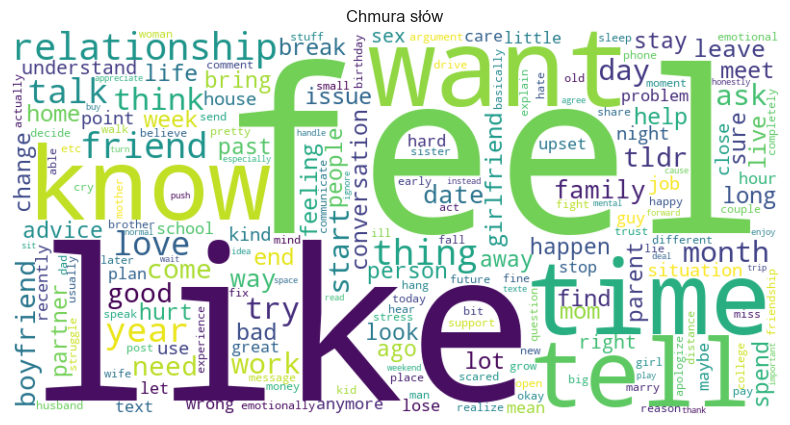

In [ ]:
# 2 Chmura s≈Ç√≥w po filtrowaniu
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_words)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Chmura s≈Ç√≥w")
plt.show()

# Wnioski
Analiza najczƒô≈õciej u≈ºywanych s≈Ç√≥w wskazuje, ≈ºe posty w r/relationships sƒÖ silnie nacechowane emocjonalnie i introspekcyjnie. U≈ºytkownicy skupiajƒÖ siƒô na uczuciach, potrzebach, relacjach z partnerami oraz pr√≥bach zrozumienia i naprawy trudnych sytuacji interpersonalnych.

## Tematyka emocjonalna jest dominujƒÖca

U≈ºytkownicy reddita wƒÖtku r/relationships zdecydowanie koncentrujƒÖ siƒô na swoim stanie emocjonalnym i potrzebach

Najczƒôstsze s≈Çowa to:
feel, like, want, love, think, know, try

To silnie subiektywne i introspekcyjne s≈Çowa, wskazujƒÖce na:

- wyra≈ºanie emocji,
- potrzebƒô zrozumienia sytuacji,
- pr√≥by analizy w≈Çasnych uczuƒá.

## ZwiƒÖzki i relacje sƒÖ kluczowym motywem

S≈Çowa takie jak:
relationship, friend, boyfriend, love, come

WskazujƒÖ na to, ≈ºe autorzy czƒôsto analizujƒÖ relacje miƒôdzyludzkie (z partnerem, przyjaci√≥≈Çmi), czƒôsto omawiajƒÖ kwestie dotyczƒÖce partner√≥w (boyfriend) lub zmian w relacji (come, go, start).

## Czas i d≈Çugo≈õƒá trwania relacji sƒÖ istotnymi elementami:

S≈Çowa takie jak:
time, year, month, start

mogƒÖ m√≥wiƒá o:

- d≈Çugo≈õci relacji,
- przesz≈Ço≈õƒáci i tera≈∫niejszo≈õƒá w zwiƒÖzku,
- przedstawiaƒá punkty zwrotne (np. ‚Äûwe started dating 6 months ago‚Äù).

## Komunikacja i dzia≈Çanie: kluczowe dla konflikt√≥w

S≈Çowa typu:
talk, tell, ask, work, try, come

pokazujƒÖ, ≈ºe autorzy:

- szukajƒÖ sposobu na rozwiƒÖzanie problem√≥w,
- koncentrujƒÖ siƒô na rozmowie, pytaniu, dzia≈Çaniu ‚Äì co sugerujƒÖ poni≈ºsze zdania:
         ‚Äûchcƒô co≈õ naprawiƒá, ale nie wiem jak‚Äù lub ‚Äûnie potrafiƒô siƒô dogadaƒá‚Äù.

## Ton narracji: introspekcyjny i problemowy

DominujƒÖce czasowniki (feel, want, try, think) wskazujƒÖ na to, ≈ºe:

- u≈ºytkownicy najczƒô≈õciej nie opisujƒÖ fakt√≥w, ale dzielƒÖ siƒô przemy≈õleniami i uczuciami,
- ton wypowiedzi jest osobisty i emocjonalny.

# Bigramy

In [ ]:
import nltk
from nltk.util import bigrams

# Tworzenie bigram√≥w
bigram_list = list(bigrams(all_words))
bigram_freq = Counter(bigram_list)

# Filtrowanie
filtered_bigrams = {
    f"{w1} {w2}": count for (w1, w2), count in bigram_freq.items() if count > 5
}

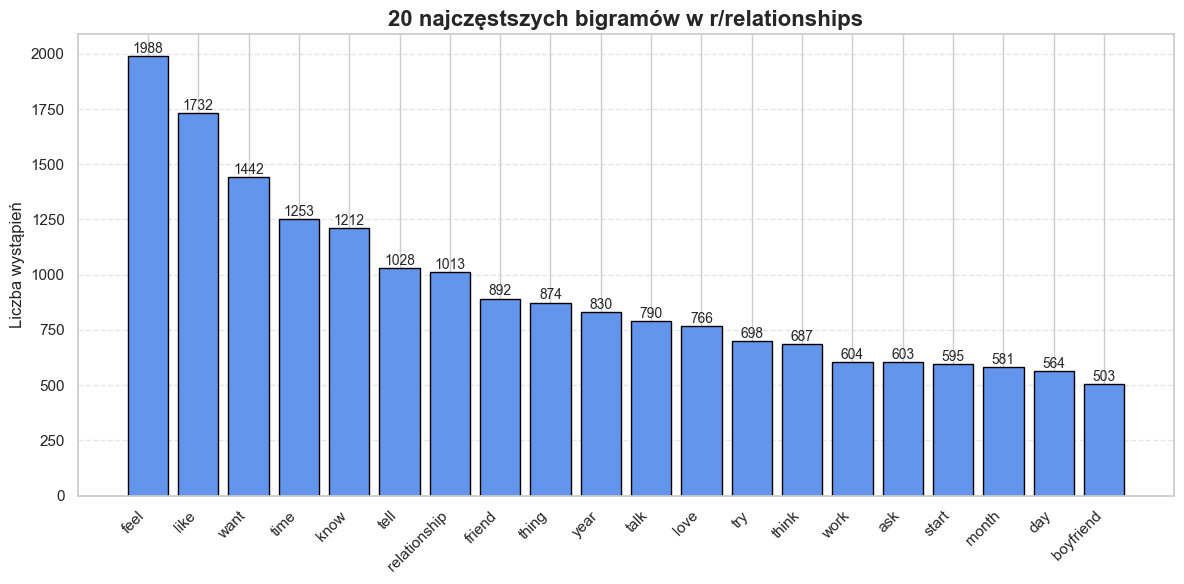

In [ ]:
import matplotlib.pyplot as plt

# Dane
common_words_bigrams = dict(Counter(filtered_bigrams).most_common(20))
words = list(common_words.keys())
counts = list(common_words.values())

# Wykres
plt.figure(figsize=(12, 6))
bars = plt.bar(words, counts, color='cornflowerblue', edgecolor='black')

# Etykiety na s≈Çupkach
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

# Styl i opis

plt.title("20 najczƒôstszych bigram√≥w w r/relationships", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Liczba wystƒÖpie≈Ñ")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\Jakub\AppData\Local\Temp\ipykernel_32016\2270879468.py:15: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Jakub\AppData\Local\Temp\ipykernel_32016\2270879468.py:15: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Jakub\Documents\Kuba\Studia\Projekty GIT\Text Mining\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Jakub\Documents\Kuba\Studia\Projekty GIT\Text Mining\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


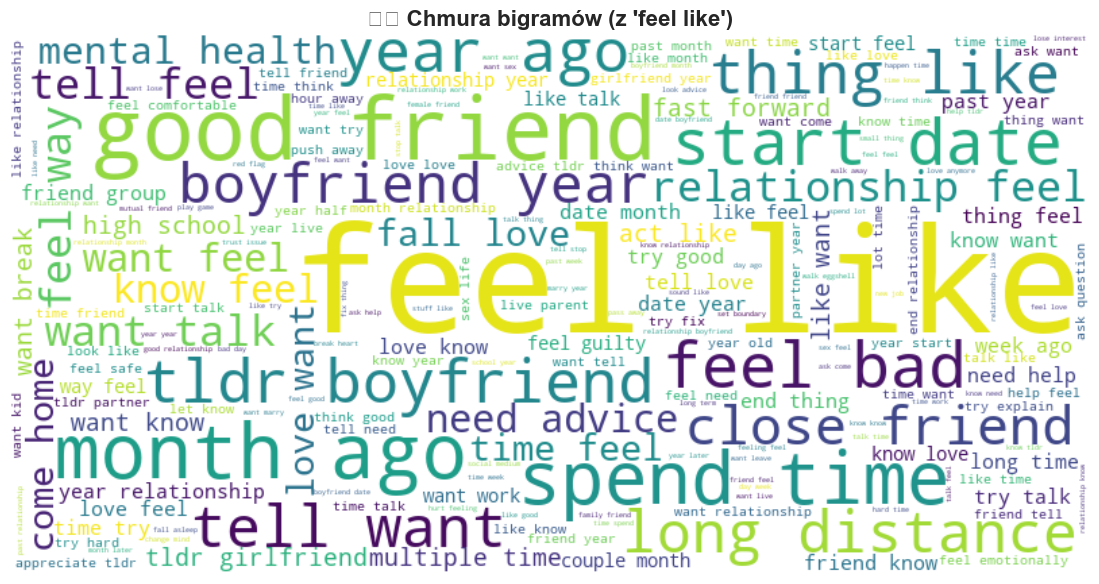

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Chmura z bigramem "feel like"
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(filtered_bigrams)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Chmura bigram√≥w (z 'feel like')", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


1. Najczƒôstszy bigram feel like pojawi≈Ç siƒô znacznie czƒô≈õciej ni≈º pozosta≈Çe. Ze wzglƒôdu na jego og√≥lnikowo≈õƒá i zaburzenie proporcji wykresu, zosta≈Ç wykluczony z ko≈Ñcowej wizualizacji
2. fraza "tldr boyfriend" r√≥wnie≈º zosta≈Ça usuniƒôta poniewa≈º nie zawiera semantyki, tak samo jak wiele innych wyraz√≥w

In [ ]:
# Usuwanie bigram√≥w nie zawierajƒÖcych semantyki
to_remove = {
    "feel like", "tldr boyfriend", "month ago", "year ago",
    "thing like", "spend time", "start date", "tell want", "tell feel",
    "feel way", "know feel", "like want", "time feel", "multiple time",
    "tldr girlfriend", "fall love", "come home", "relationship feel",
    "high school", "week ago", "date year", "date month",
    "fast forward", "boyfriend year"
}

# Nowy df ‚Äì bez nieistotnych bigram√≥w
cleaned_bigrams = {
    bigram: count for bigram, count in filtered_bigrams.items()
    if bigram not in to_remove
}


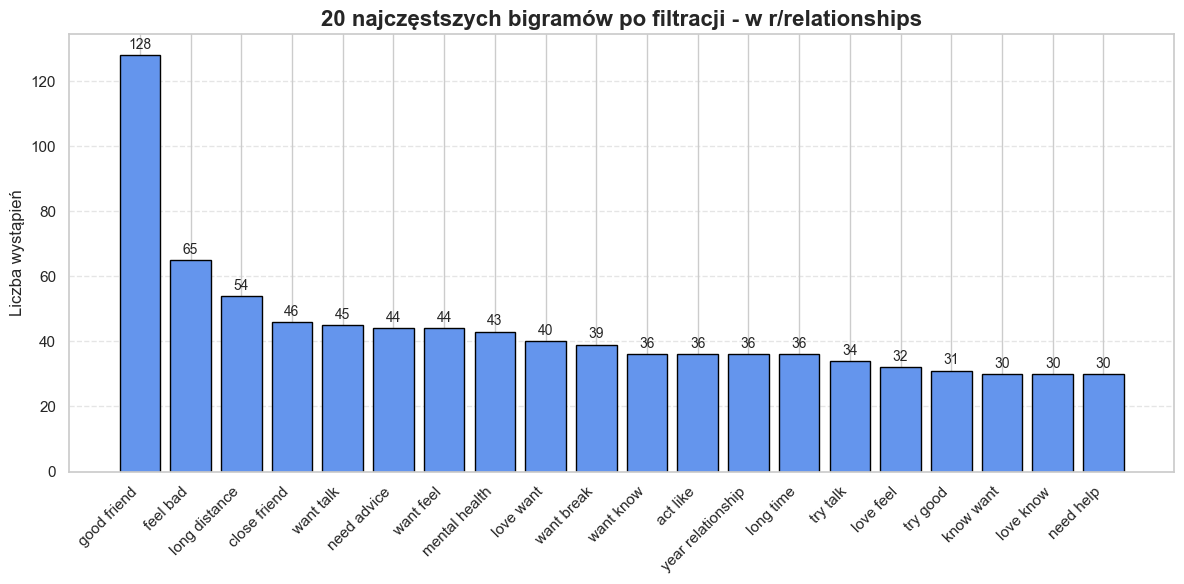

In [ ]:
import matplotlib.pyplot as plt

# Dane
common_words = dict(Counter(cleaned_bigrams).most_common(20))
words = list(common_words.keys())
counts = list(common_words.values())

# Wykres
plt.figure(figsize=(12, 6))
bars = plt.bar(words, counts, color='cornflowerblue', edgecolor='black')

# Etykiety na s≈Çupkach
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

# Styl i opis

plt.title("20 najczƒôstszych bigram√≥w po filtracji - w r/relationships", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Liczba wystƒÖpie≈Ñ")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


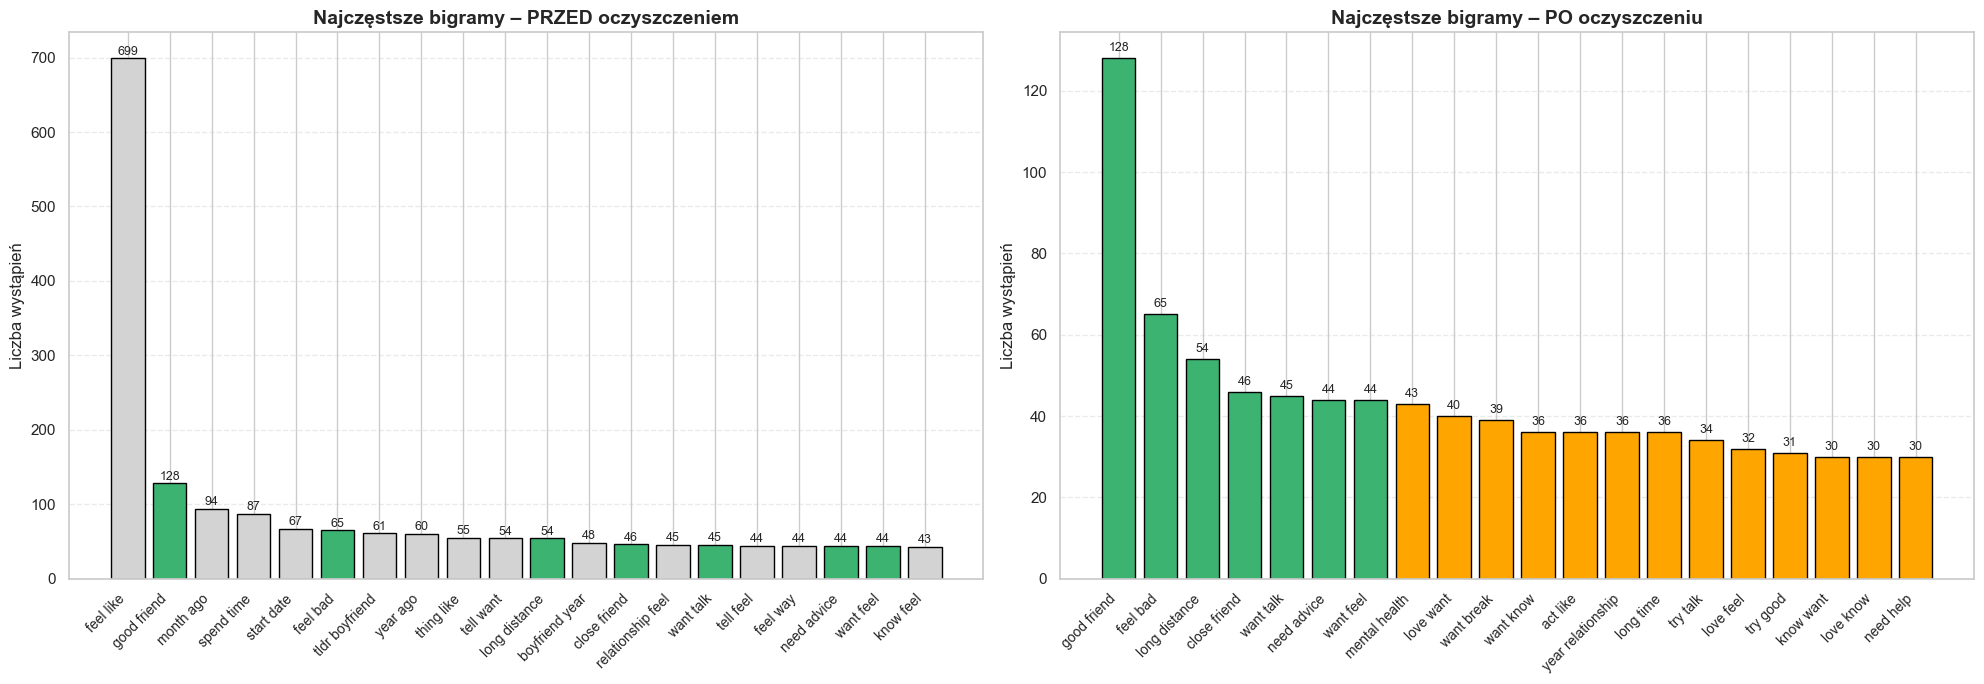

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Dane
bigrams_raw = dict(Counter(filtered_bigrams).most_common(20))
bigrams_clean = dict(Counter(cleaned_bigrams).most_common(20))

# Listy i zbiory
words_raw = list(bigrams_raw.keys())
counts_raw = list(bigrams_raw.values())

words_clean = list(bigrams_clean.keys())
counts_clean = list(bigrams_clean.values())

set_raw = set(words_raw)
set_clean = set(words_clean)

# Wsp√≥lne, nowe i usuniƒôte
common = set_raw & set_clean
removed = set_raw - set_clean
new = set_clean - set_raw

# === WYKRESY OBOK SIEBIE ===
plt.figure(figsize=(20, 7))

# 1Ô∏è‚É£ WYKRES: PRZED oczyszczeniem
plt.subplot(1, 2, 1)
colors1 = ['mediumseagreen' if w in common else 'lightgray' for w in words_raw]
bars1 = plt.bar(words_raw, counts_raw, color=colors1, edgecolor='black')
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)
plt.title("Najczƒôstsze bigramy ‚Äì PRZED oczyszczeniem", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel("Liczba wystƒÖpie≈Ñ")
plt.grid(axis='y', linestyle='--', alpha=0.4)

# 2Ô∏è‚É£ WYKRES: PO oczyszczeniu
plt.subplot(1, 2, 2)
colors2 = ['orange' if w in new else 'mediumseagreen' for w in words_clean]
bars2 = plt.bar(words_clean, counts_clean, color=colors2, edgecolor='black')
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)
plt.title("Najczƒôstsze bigramy ‚Äì PO oczyszczeniu", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylabel("Liczba wystƒÖpie≈Ñ")
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


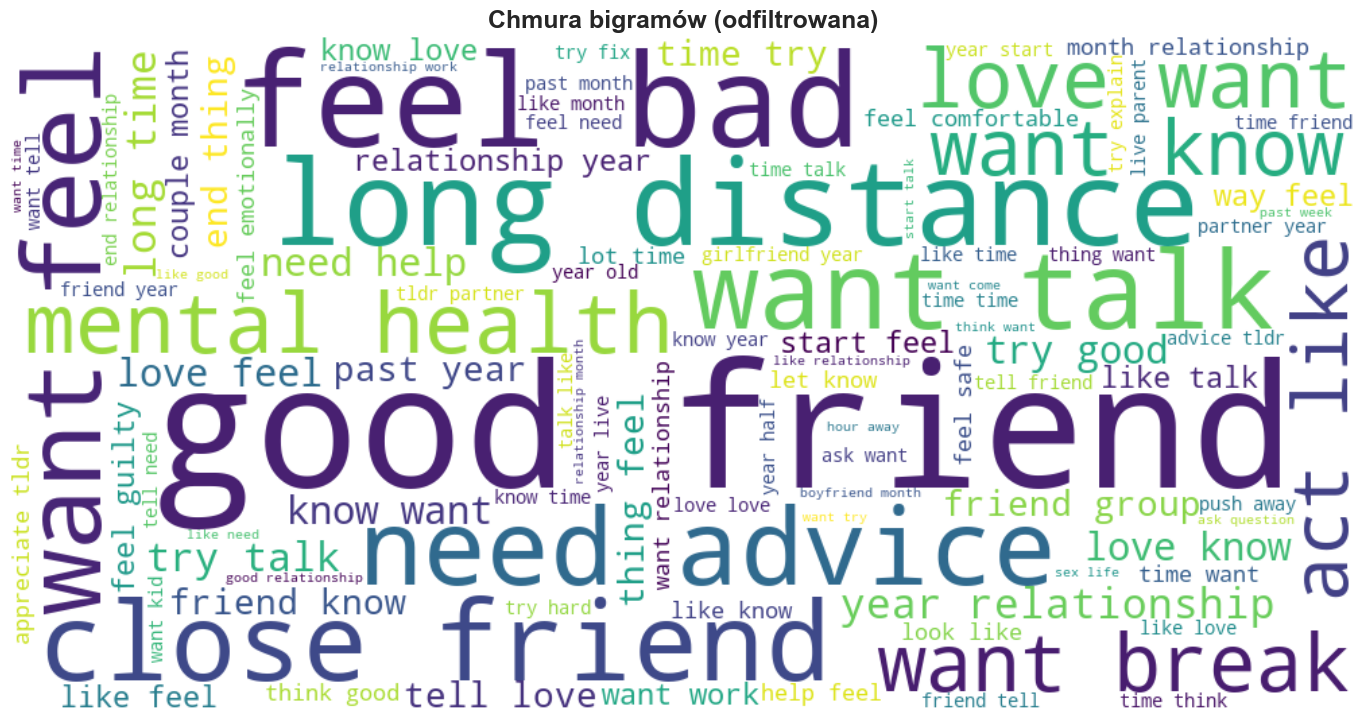

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Estetyczna konfiguracja chmury
bigram_wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='viridis',           # inne: 'plasma', 'cool', 'magma', 'cubehelix'
    max_words=100,
    prefer_horizontal=0.9,
    contour_color='steelblue',
    contour_width=1,
    random_state=42
).generate_from_frequencies(cleaned_bigrams)

# Wykres
plt.figure(figsize=(14, 7))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Chmura bigram√≥w (odfiltrowana)", fontsize=18, fontweight='bold')
plt.tight_layout(pad=0)
plt.show()


# Wnioski z analizy bigram√≥w
Najczƒôstsze bigramy w postach z r/relationships pokazujƒÖ, ≈ºe u≈ºytkownicy zmagajƒÖ siƒô przede wszystkim z emocjami, niepewno≈õciƒÖ i komunikacjƒÖ w relacjach ‚Äî zar√≥wno romantycznych, jak i przyjacielskich.
Dane ujawniajƒÖ wysoki poziom introspekcji i potrzebƒô zrozumienia lub wsparcia, a tak≈ºe czƒôste odniesienia do zwiƒÖzk√≥w na odleg≈Ço≈õƒá i problem√≥w zdrowia psychicznego.

## Relacje przyjacielskie i bliskie znajomo≈õci majƒÖ ogromne znaczenie
Najczƒôstszy bigram to good friend, a tak≈ºe w zbiorze widaƒá frazy close friend i friend group.

Pokazuje to, ≈ºe u≈ºytkownicy czƒôsto opisujƒÖ swoje relacje z przyjaci√≥≈Çmi, nie tylko partnerami.

Mo≈ºliwe tematy:
- uczucia do przyjaciela,
- konflikty w grupie znajomych,
- ‚Äûfriendzone‚Äù.

## Emocje i psychiczne samopoczucie sƒÖ dominujƒÖcym motywem

Bigramy takie jak feel bad, mental health, love feel, try good, need help wskazujƒÖ na:

- wysoki poziom autorefleksji,
- emocjonalne cierpienie,
- szukanie wsparcia i zrozumienia.
- Subreddit pe≈Çni wyra≈∫nie funkcjƒô emocjonalnego wentyla.

## ZwiƒÖzki na odleg≈Ço≈õƒá i z≈Ço≈ºone sytuacje romantyczne

1. Bigram long distance jest trzeci na li≈õcie ‚Äî to wyra≈∫ny sygna≈Ç, ≈ºe wiele os√≥b porusza temat trudno≈õci w relacjach na odleg≈Ço≈õƒá.

2. W po≈ÇƒÖczeniu z frazami love want, want break, year relationship pokazuje to zr√≥≈ºnicowane etapy i kryzysy w zwiƒÖzkach.

## Potrzeba komunikacji i zrozumienia
Bigramy: want talk, try talk, need advice, know want

- WskazujƒÖ na problem z komunikacjƒÖ i chƒôƒá rozwiƒÖzania sytuacji poprzez rozmowƒô lub pytanie innych o radƒô.

- Wysoka czƒôstotliwo≈õƒá tych wyra≈ºe≈Ñ pokazuje, ≈ºe brak komunikacji jest jednym z najczƒôstszych powod√≥w post√≥w.

## Z≈Ço≈ºono≈õƒá relacji romantycznych
Bigramy: love want, want know, love know, want break, year relationship

- WskazujƒÖ na ambiwalencjƒô emocjonalnƒÖ, konflikty miƒôdzy uczuciem a dzia≈Çaniem.

- U≈ºytkownicy czƒôsto sƒÖ na rozdro≈ºu: ‚Äûczy zostaƒá, czy odej≈õƒá?‚Äù, ‚Äûczy to jeszcze mi≈Ço≈õƒá, czy ju≈º przyzwyczajenie?‚Äù

In [ ]:
# Sprawdzenie wystƒÖpie≈Ñ poszczeg√≥lnych zestaw√≥w

from collections import defaultdict

# Tworzenie struktury: {rdze≈Ñ: [(bigram, liczba)]}
bigram_groups = defaultdict(list)

for bigram, count in filtered_bigrams.items():
    w1, w2 = bigram.split()
    bigram_groups[w1].append((f"{w1} {w2}", count))

# Sortowanie ka≈ºdego zestaw wed≈Çug liczby wystƒÖpie≈Ñ
for root in bigram_groups:
    bigram_groups[root].sort(key=lambda x: x[1], reverse=True)

# Poka≈º wybrane rdzenie
selected_roots = ["want", "feel", "try", "love"]

for root in selected_roots:
    print(f"\nBigramy zaczynajƒÖce siƒô od '{root}':")
    for bigram, count in bigram_groups[root]:
        print(f"  {bigram}: {count}")



Bigramy zaczynajƒÖce siƒô od 'want':
  want talk: 45
  want feel: 44
  want break: 39
  want know: 36
  want work: 25
  want relationship: 23
  want tell: 19
  want kid: 19
  want come: 18
  want time: 18
  want try: 18
  want sex: 17
  want leave: 16
  want want: 16
  want live: 15
  want marry: 14
  want lose: 14
  want start: 14
  want thing: 13
  want spend: 13
  want love: 13
  want partner: 12
  want friend: 12
  want hurt: 12
  want hear: 11
  want meet: 11
  want happy: 11
  want continue: 10
  want change: 10
  want hang: 10
  want end: 10
  want stay: 9
  want bring: 9
  want ask: 9
  want like: 9
  want family: 9
  want understand: 8
  want let: 8
  want think: 7
  want help: 7
  want breakup: 7
  want good: 7
  want anymore: 7
  want play: 7
  want support: 6
  want future: 6
  want wait: 6
  want sure: 6
  want day: 6
  want kiss: 6
  want share: 6
  want boyfriend: 6

Bigramy zaczynajƒÖce siƒô od 'feel':
  feel like: 699
  feel bad: 65
  feel way: 44
  feel guilty: 25
  

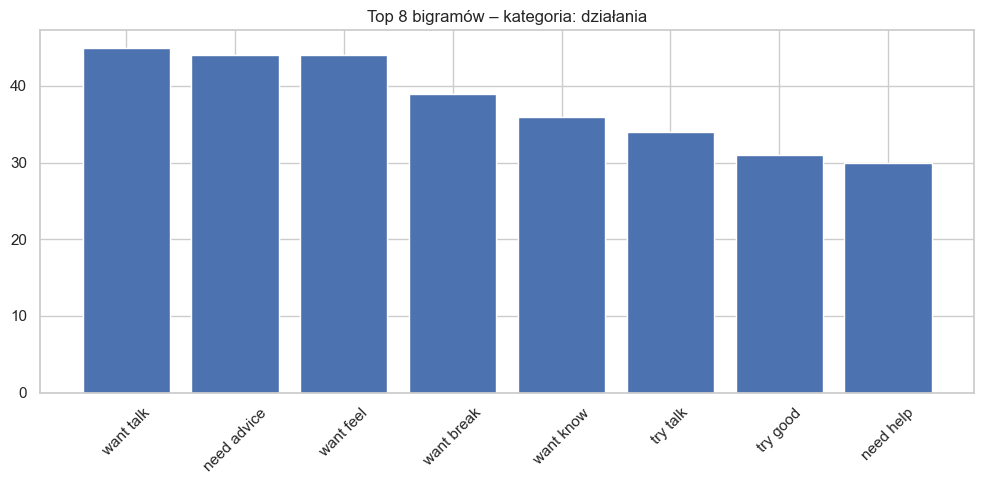

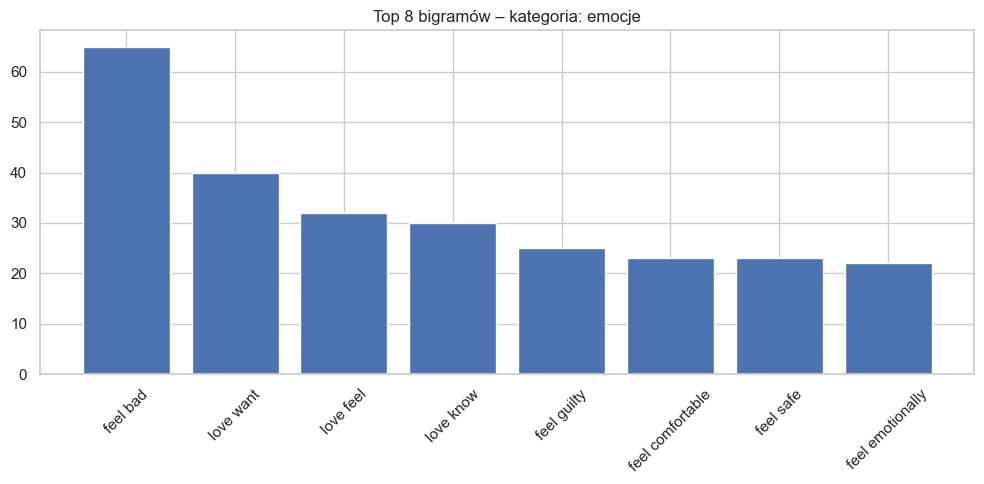

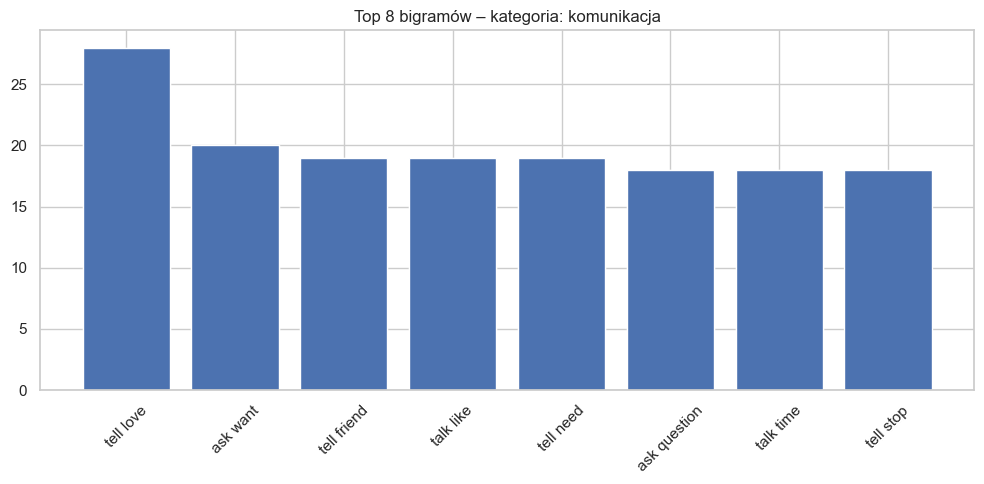

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Kategorie tematyczne na podstawie rdzeni
category_roots = {
    "emocje": {"feel", "love"},
    "dzia≈Çania": {"want", "need", "try"},
    "komunikacja": {"talk", "say", "tell", "ask"},
}

# Przypiszemy bigramy do kategorii
categorized_bigrams = defaultdict(list)

for bigram, count in cleaned_bigrams.items():
    w1, w2 = bigram.split()
    if w1 == w2:
        continue  # pomi≈Ñ duplikaty np. love love, feel feel
    for category, root_set in category_roots.items():
        if w1 in root_set:
            categorized_bigrams[category].append((bigram, count))
    root = bigram.split()[0]
    for category, root_set in category_roots.items():
        if root in root_set:
            categorized_bigrams[category].append((bigram, count))

# Rysowanie wykres√≥w dla ka≈ºdej kategorii
for category, items in categorized_bigrams.items():
    # sortowanie malejƒÖco
    items = sorted(items, key=lambda x: x[1], reverse=True)[:15]
    bigrams = [x[0] for x in items]
    counts = [x[1] for x in items]

    # wykres
    plt.figure(figsize=(10, 5))
    plt.bar(bigrams, counts)
    plt.xticks(rotation=45)
    plt.title(f"Top 8 bigram√≥w ‚Äì kategoria: {category}")
    plt.tight_layout()
    plt.show()


# Wnioski

## Kategoria ‚Äûdzia≈Çania"

### U≈ºytkownicy wykazujƒÖ du≈ºƒÖ potrzebƒô komunikacji
Bigramy:
- want talk
- try talk

znajdujƒÖ siƒô na szczycie zestawienia. To pokazuje, ≈ºe autorzy post√≥w:

1. chcƒÖ rozmawiaƒá ze swoimi partnerami lub przyjaci√≥≈Çmi,
2. pr√≥bujƒÖ rozwiƒÖzaƒá konflikty poprzez dialog,
3. czƒôsto zmagajƒÖ siƒô z brakiem skutecznej komunikacji.

### Poszukiwania wsparcia i porady
Bigramy:
- need advice
- need help

wskazujƒÖ, ≈ºe u≈ºytkownicy:

1. czƒôsto nie potrafiƒÖ samodzielnie rozwiƒÖzaƒá swoich problem√≥w,
2. aktywne poszukiwanie pomocy to czƒôsty motyw na subreddicie,
3. Reddit pe≈Çni funkcjƒô spo≈Çeczno≈õciowego ‚Äûdoradcy‚Äù.

### Czƒôsto stojƒÖ przed decyzjƒÖ o zako≈Ñczeniu relacji

- want break ‚Äì sugeruje chƒôƒá zako≈Ñczenia zwiƒÖzku.

- want know ‚Äì mo≈ºe oznaczaƒá niepewno≈õƒá decyzyjnƒÖ, potrzebƒô wyja≈õnienia sytuacji, np. ‚Äûczy on mnie kocha?‚Äù, ‚Äûczy to ma sens?‚Äù.

Wniosek: dzia≈Çania zwiƒÖzane z rozstaniem i wƒÖtpliwo≈õciami sƒÖ powszechne.

### Intencje dzia≈Çania sƒÖ emocjonalnie nacechowane majƒÖce na celu poprawƒô relacji

- try good ‚Äì nietypowy, ale znaczƒÖcy bigram. Mo≈ºe odnosiƒá siƒô do:
    - pr√≥b ‚Äûbycia dobrym partnerem‚Äù,
    - wewnƒôtrznej potrzeby poprawy siebie lub sytuacji.

- want work ‚Äì czƒôsto wystƒôpujƒÖcy w kontek≈õcie: ‚Äûchcƒô, ≈ºeby to zadzia≈Ça≈Ço‚Äù, ‚Äûchcƒô naprawiƒá zwiƒÖzek‚Äù.

## Kategoria ‚Äûemocje‚Äù
### Negatywne emocje sƒÖ najczƒô≈õciej wyra≈ºane

Najczƒôstszy bigram to feel bad, a zaraz za nim:
- feel guilty, love want, love feel

U≈ºytkownicy czƒôsto piszƒÖ o:

- wyrzutach sumienia,
- niezadowoleniu z relacji,
- trudnych emocjach zwiƒÖzanych z mi≈Ço≈õciƒÖ.

To potwierdza, ≈ºe wƒÖtek ma charakter kryzysowy i introspekcyjny.

### Mi≈Ço≈õƒá wiƒÖ≈ºe siƒô z niepewno≈õciƒÖ i konfliktami
Bigramy:
- love want
- love feel
- love know

WskazujƒÖ na to, ≈ºe uczucia nie sƒÖ proste ‚Äì czƒôsto wystƒôpujƒÖ obok:

- chƒôci czego≈õ wiƒôcej,
- braku pewno≈õci co do w≈Çasnych emocji,
- lub potrzeby zrozumienia drugiej strony.

### Bezpiecze≈Ñstwo emocjonalne jest wa≈ºnym tematem
- feel safe
- feel comfortable
- feel emotionally

to sygna≈Ç, ≈ºe wiele os√≥b:

- ocenia swoje zwiƒÖzki przez pryzmat emocjonalnego komfortu,
- brak poczucia bezpiecze≈Ñstwa mo≈ºe byƒá impulsem do napisania posta.

## Kategoria ‚Äûdzia≈Çania"

### Komunikacja o uczuciach jest kluczowa
Najczƒôstszy bigram: tell love

- U≈ºytkownicy czƒôsto rozwa≈ºajƒÖ, czy:
    - powiedzieƒá drugiej osobie, ≈ºe jƒÖ kochajƒÖ,
    - wyznaƒá uczucia po czasie,
    - a tak≈ºe martwiƒÖ siƒô, ≈ºe nie potrafiƒÖ tego zrobiƒá.

PodsumowujƒÖc, wyra≈ºanie emocji werbalnie to jedna z najczƒôstszych trudno≈õci i temat√≥w w relacjach.

### Komunikacja potrzeb i decyzji
Bigramy: tell need, ask want, tell stop

WskazujƒÖ na pr√≥bƒô:
- wyra≈ºenia w≈Çasnych granic i potrzeb,
- powiedzenia komu≈õ, ≈ºeby co≈õ zako≈Ñczy≈Ç lub zmieni≈Ç.

Interpretacja: Reddit pe≈Çni rolƒô miejsca, gdzie ludzie uczƒÖ siƒô, jak komunikowaƒá w≈Çasne oczekiwania i potrzeby emocjonalne.

### Rozmowy z osobami trzecimi i doradztwo

- tell friend,
- ask question

Pokazuje, ≈ºe:
- u≈ºytkownicy dzielƒÖ siƒô problemami z przyjaci√≥≈Çmi,
- szukajƒÖ zewnƒôtrznej opinii (np. od znajomych lub spo≈Çeczno≈õci Reddita).


# Podsumowanie

Subreddit r/relationships pe≈Çni funkcjƒô emocjonalnego wentyla i miejsca szukania wsparcia.
Wypowiedzi u≈ºytkownik√≥w sƒÖ zdominowane przez introspekcjƒô, emocjonalne napiƒôcia i trudno≈õci komunikacyjne.
U≈ºytkownicy czƒôsto dzielƒÖ siƒô swoimi wƒÖtpliwo≈õciami i szukajƒÖ porady dotyczƒÖcej decyzji w zwiƒÖzkach i przyja≈∫niach.
Analiza s≈Ç√≥w i bigram√≥w pokaza≈Ça, ≈ºe najwa≈ºniejszymi osiami tematycznymi sƒÖ: emocje, dzia≈Çania (decyzje) i komunikacja, a jƒôzyk u≈ºytkownik√≥w odzwierciedla typowe problemy wsp√≥≈Çczesnych relacji miƒôdzyludzkich.

Najczƒôstsze frazy zwiƒÖzane z dzia≈Çaniem ujawniajƒÖ, ≈ºe u≈ºytkownicy r/relationships sƒÖ zorientowani na rozwiƒÖzywanie problem√≥w, ale czƒôsto czujƒÖ siƒô zagubieni i bezradni.
PoszukujƒÖ rozmowy, rady i jasno≈õci, a niejednokrotnie rozwa≈ºajƒÖ zerwanie lub ratowanie zwiƒÖzku.
Widaƒá silnƒÖ potrzebƒô dzia≈Çania, ale te≈º brak narzƒôdzi lub odpowiedzi, jak to zrobiƒá.

Emocjonalna warstwa post√≥w w r/relationships pokazuje silne nacechowanie negatywnymi uczuciami ‚Äî takimi jak poczucie winy, smutek czy brak bezpiecze≈Ñstwa.
U≈ºytkownicy zmagajƒÖ siƒô z niepewno≈õciƒÖ co do mi≈Ço≈õci oraz w≈Çasnych emocji, poszukujƒÖc zrozumienia, ulgi i emocjonalnego wsparcia.

Komunikacja ‚Äî zar√≥wno werbalna, jak i niewerbalna ‚Äî jest jednym z najczƒôstszych ≈∫r√≥de≈Ç napiƒôcia w zwiƒÖzkach opisywanych na r/relationships.
U≈ºytkownicy szukajƒÖ sposob√≥w na wyra≈ºanie emocji, granic i potrzeb, a tak≈ºe czƒôsto anga≈ºujƒÖ osoby trzecie (przyjaci√≥≈Ç, spo≈Çeczno≈õƒá), by zrozumieƒá, jak i co powiedzieƒá.
Trudno≈õci te czƒôsto wynikajƒÖ z niepewno≈õci, lƒôku przed reakcjƒÖ drugiej osoby lub braku umiejƒôtno≈õci komunikacyjnych.
